## Steps Involved in Creating end-to-end Machine Learning Algorithm:

1) Importing basic Libraries<br>
2) Importing the data<br>
3) Getting an understanding about the data with which you are working<br>
4) Getting an understanding about the problem that you are trying to solve<br>
5) Rigorous EDA (Visualization etc) -> Patterns<br>
6) Patterns -> Shortlist the probable list of ML Algorithms (2-3)<br>
7) Creating separate Jupyter Notebooks for pre-processing the data for 2-3 algorithms<br>
&nbsp;&nbsp;&nbsp;&nbsp; Data Prepration (Assumptions and Limitations of ML Algorithm should be satisfied)<br>
8) Feature Engineering (Deriving new features having better correlation with Target)<br>
9) Feature Selection<br>
10) Train Test Split<br>
11) Training/Fitting the ML Model<br>
12) Predicting from the Pretrained Model<br>
13) Evaluating the model<br>
14) Optimization Methods -> If results of model evaulation don't meet your criteria<br>
15) Deploy the model production -> MLOps<br>
16) Maitenance work of the Model<br>

In [14]:
# Importing Important Libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing the Data

df = pd.read_csv('Mall_Customers_BP.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Getting an idea about the NULL Values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Checking for data types of each column
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

####  EDA 
(1) 56% Female, 44% Male

#### Data Pre-processing Steps:

1) Detecting and Removing outliers in the data<br>
2) Scaling<br>
3) Elbow method (Finding optimal number of clustering)<br>

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

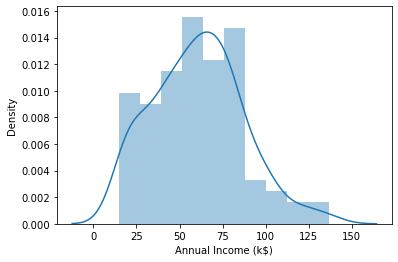

In [7]:
import seaborn as sns

# Detecting Outliers in Annual Income column
sns.distplot(df['Annual Income (k$)'], kde = True)

In [8]:
# Removing the Outliers from Annual Income Column

df = df[df['Annual Income (k$)'] < 125]

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

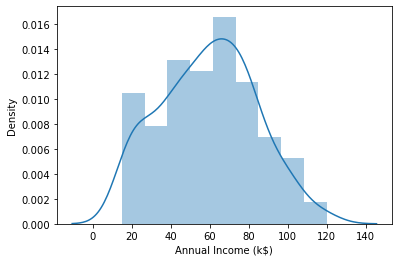

In [9]:
import seaborn as sns

sns.distplot(df['Annual Income (k$)'], kde = True)

C:\Users\shala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

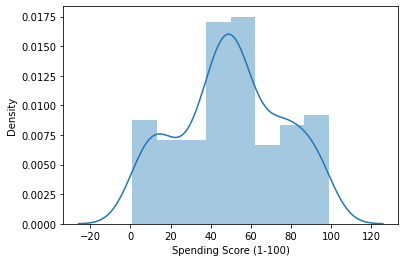

In [10]:
# Detecting Outliers in Spending Score column
sns.distplot(df['Spending Score (1-100)'], kde = True)

There are no outliers present in Spending Score column, as the distribution curve appeas to be normal.

In [12]:
# Scaling

scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.808460,-0.435233
1,2,Male,21,-1.808460,1.198529
2,3,Female,20,-1.767464,-1.718903
3,4,Female,23,-1.767464,1.042932
4,5,Female,31,-1.726467,-0.396334


In [ ]:
# Distortion or Inertia -> Compactness of a CLuster

In [15]:
# Elbow Curve

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Making a separate array file
array1 = df['Annual Income (k$)'].to_numpy()
array2 = df['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\shala\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 : 1.2015316793540507
2 : 1.0328767473225635
3 : 0.7522947351315308
4 : 0.6309799253911533
5 : 0.4888216080702239
6 : 0.4332826412486286
7 : 0.4033953417561852
8 : 0.3776981751220798
9 : 0.3522700151748928
10 : 0.3300298282947974
11 : 0.3131819330048815
12 : 0.2996630668442097
13 : 0.27958323422711
14 : 0.27708202577788255


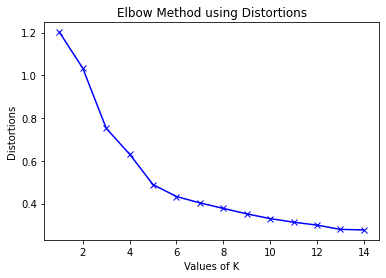

In [16]:
# Using distortions

for key, val in mapping1.items():
    print(str(key) + ' : ' + str(val))

# Plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('Elbow Method using Distortions')
plt.show()

Elbow point is k=5<br>
There is a steep decrease in distortions until k=5<br>
After k=5 there still is a decrease but it is not steep, so k=5 is the optimal number for clusters<br>

1 : 392.0
2 : 258.5419516528517
3 : 154.8833101089537
4 : 103.94047329878384
5 : 57.52267788325068
6 : 48.53062735991557
7 : 41.39679992950305
8 : 34.905461116828015
9 : 30.158814072173996
10 : 27.028872803138494
11 : 23.985101078559005
12 : 21.576802264672388
13 : 19.324468852090426
14 : 18.673010641807405


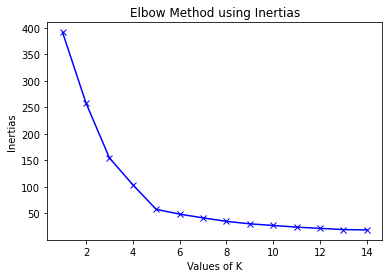

In [19]:
# Using inertia

for key, val in mapping2.items():
    print(str(key) + ' : ' + str(val))

# Plot
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('Elbow Method using Inertias')
plt.show()

In [20]:
# Training the Optimal Model and getting the Centroids

data = pd.DataFrame(array, columns = ('Annual Income (k$)', 'Spending Score (1-100)'))

kmeans = KMeans(n_clusters = 5).fit(data)
centroids = kmeans.cluster_centers_
print('Centroids: \n', centroids)

Centroids: 
 [[-1.36867665  1.13487562]
 [ 1.04195523 -1.23698675]
 [ 1.02475012  1.2500437 ]
 [-0.18435683 -0.00634578]
 [-1.34501842 -1.13879942]]


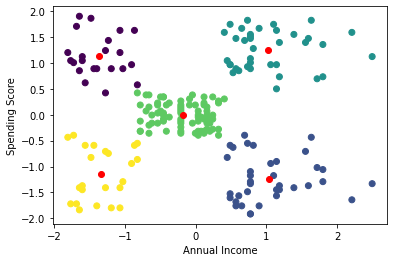

In [26]:
# Plot

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_.astype('float'))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

BUSINESS INSIGHTS:

Yellow coloured cluster represents LOW Annual Income and LOW Spending Score<br><br>
Purple coloured cluster represents LOW Annual Income but HIGH Spending Score<br><br>
Green coloured cluster represents MEDIUM Annual Income and MEDIUM Spending Score<br><br>
Dark-Blue coloured cluster represents HIGH Annual Income but LOW Spending Score<br><br>
Peacock-Green coloured cluster represents HIGH Annual Income and HIGH Spending Score

Assignment:

Create separate clusters for Male and Female Members and give some business insights on Annual Income and Spending Score columns<br>
Separate out clusters and generate some peculiarities between Males and Females' spending scores and annual incomes

Click <a href="https://github.com/shalaka-thorat/Customer-Segmentation-using-KMeans/blob/main/Customer-Segmentation%20Part%202.ipynb">HERE</a> to go to the Solved Assignment i.e. PART 2: Clustering based on Gender